# Clustering Assignment
## Crime data
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [117]:
rawdata = pd.read_csv('crime_data.csv',index_col=[0])

### Data Description:
- Murder: Muder rates in different places of United States
- Assualt: Assualt rate in different places of United States
- UrbanPop: urban population in different places of United States
- Rape: Rape rate in different places of United States

In [118]:
rawdata.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Data Visualization

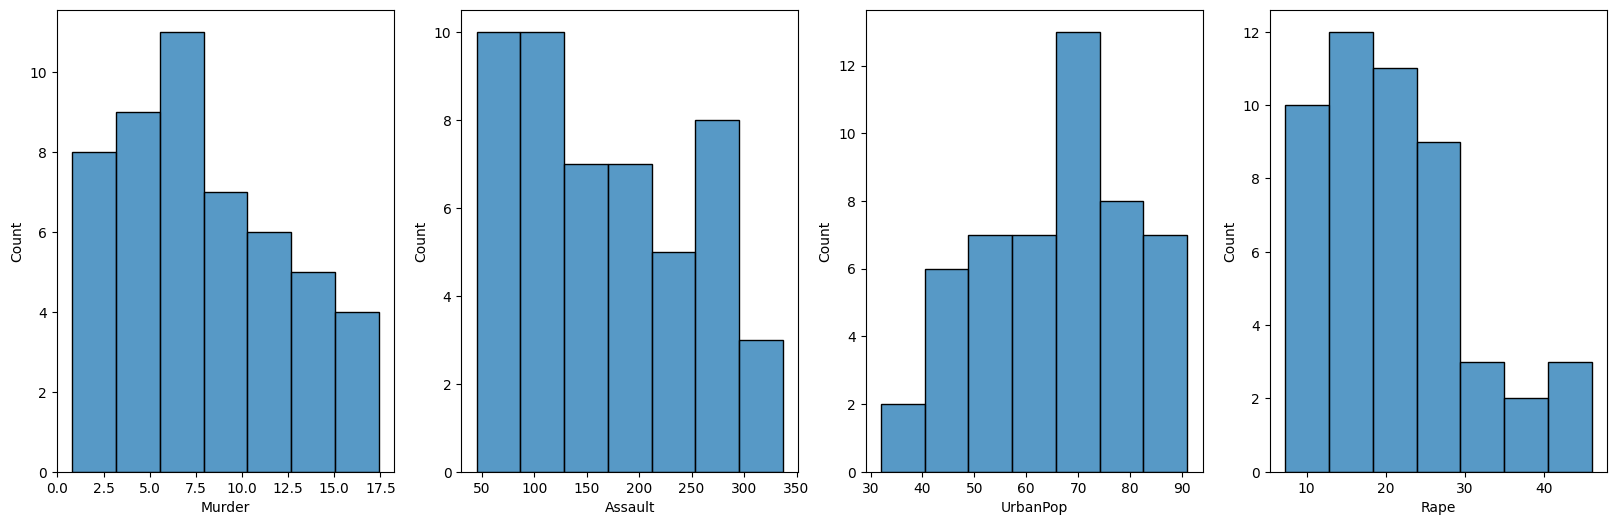

In [119]:
columns = rawdata.columns
plt.figure(figsize=(20,6))
for i in range(len(columns)):
    plt.subplot(1,4,i+1)
    sns.histplot(data=rawdata, x=columns[i])

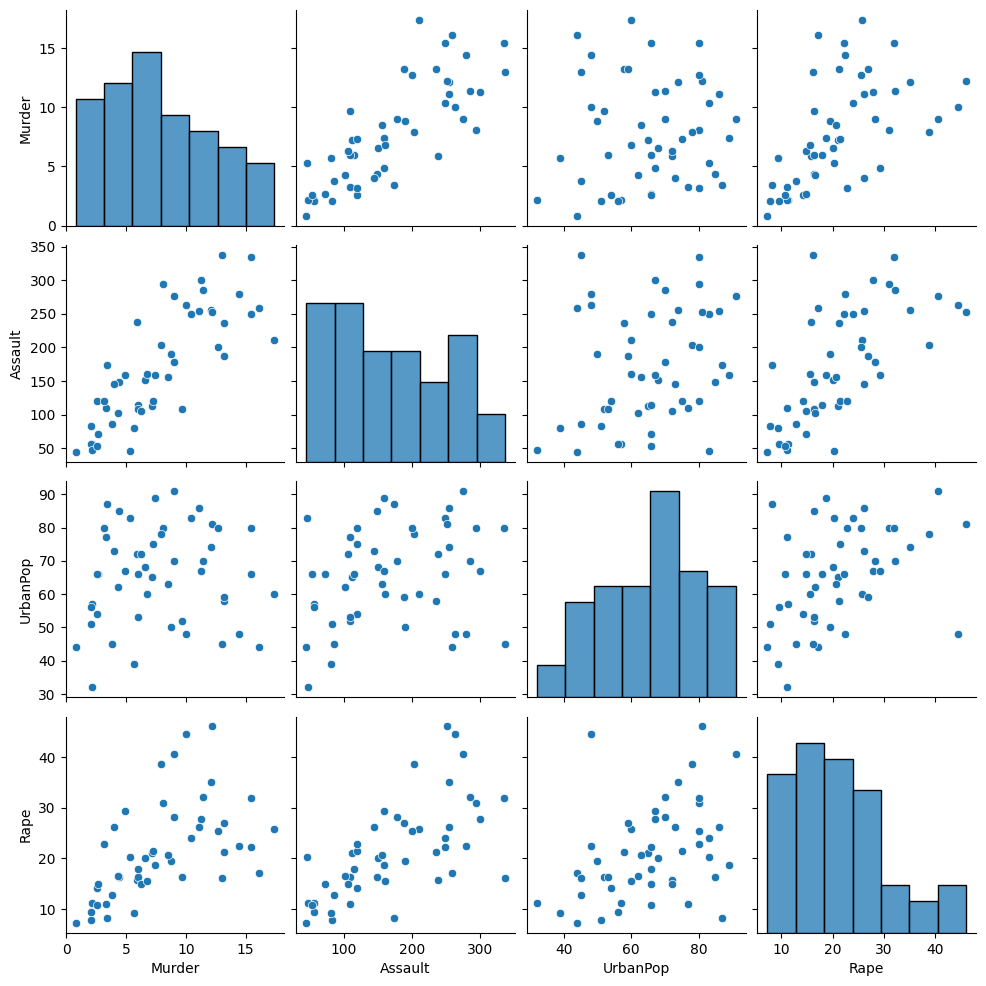

In [120]:
sns.pairplot(data=rawdata);

### Normalizing the data
For clustering data should be on same scale.

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(rawdata), columns=rawdata.columns)

In [122]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


### Visualizing clusters

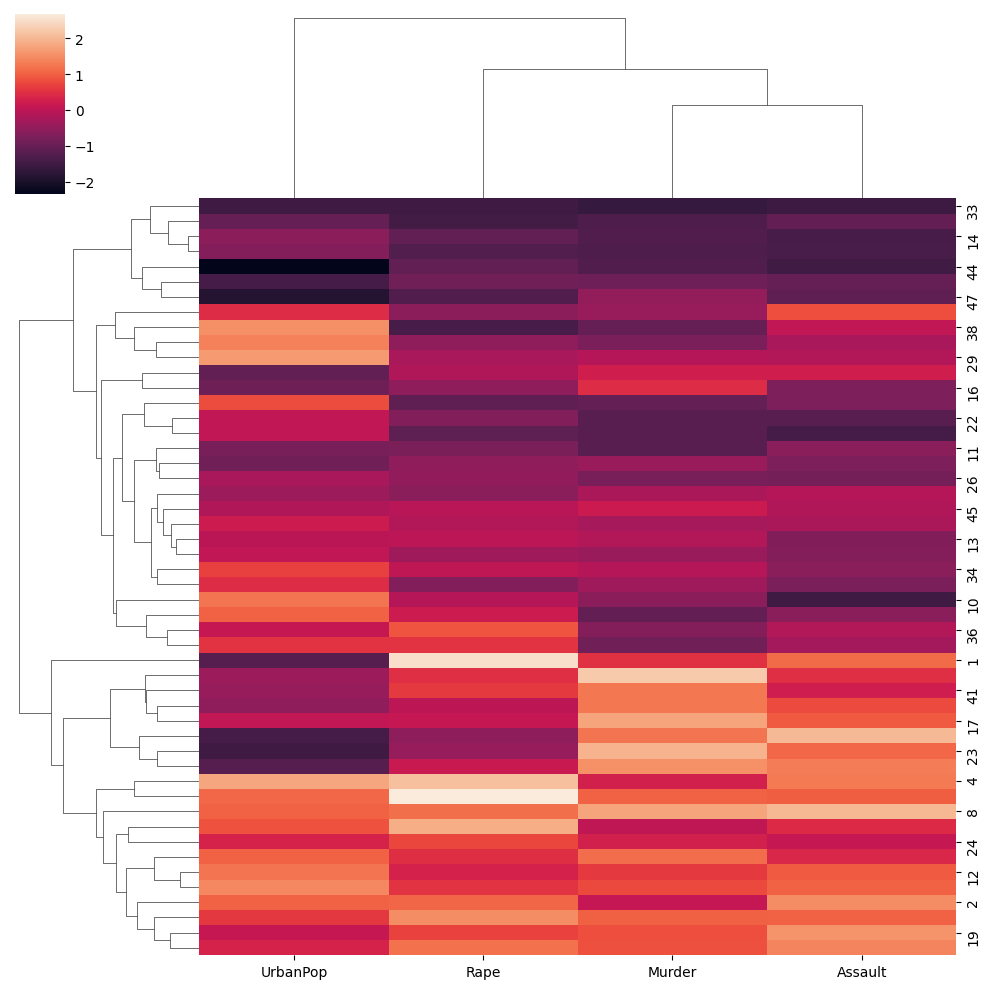

In [123]:
sns.clustermap(data=data);

To visualize cluster we will use tsne dimension reduction technique.\
So instead of using 4 variables, we extract all the imformation in two variables which are easier to plot

In [124]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=42)
array = tsne.fit_transform(data)
df = pd.DataFrame(array,columns=['x','y'])

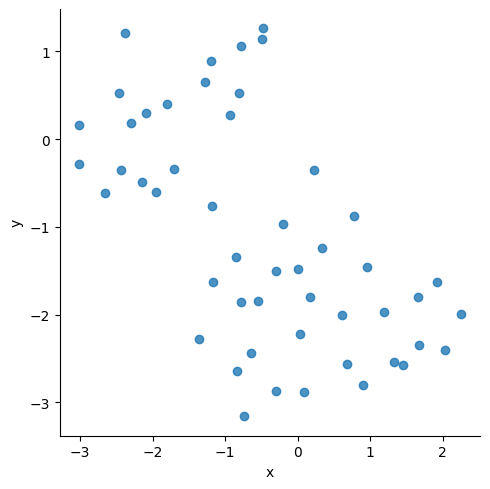

In [125]:
sns.lmplot(x='x',y='y',data=df,fit_reg=False);

### Hierarchical clustering

The algorithm of Agglomerative clustering starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied.
The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
- *ward* minimizes the variance of the clusters being merged.
- *average* uses the average of the distances of each observation of the two sets.
- *complete* linkage uses the maximum distances between all observations of the two sets.
- *single* uses the minimum of the distances between all observations of the two sets.

#### Dendrograms
<b>Dendrogram</b> is a tool to visualize hierarchical clustering that can handle multidimensional datasets.
The dendrogram shows data points on the bottom. Then, a tree is plotted with these points (representing single-point clusters) as the leaves, and a new node parent is added for each two clusters that are joined.
The <b>y-axis</b> in the dendrogram specify when in the agglomerative algorithm two clusters get merged. The <b>length</b> of each branch shows how far apart the merged clusters are.

Text(0.5, 1.0, 'Dendrogram - Ward Linkage')

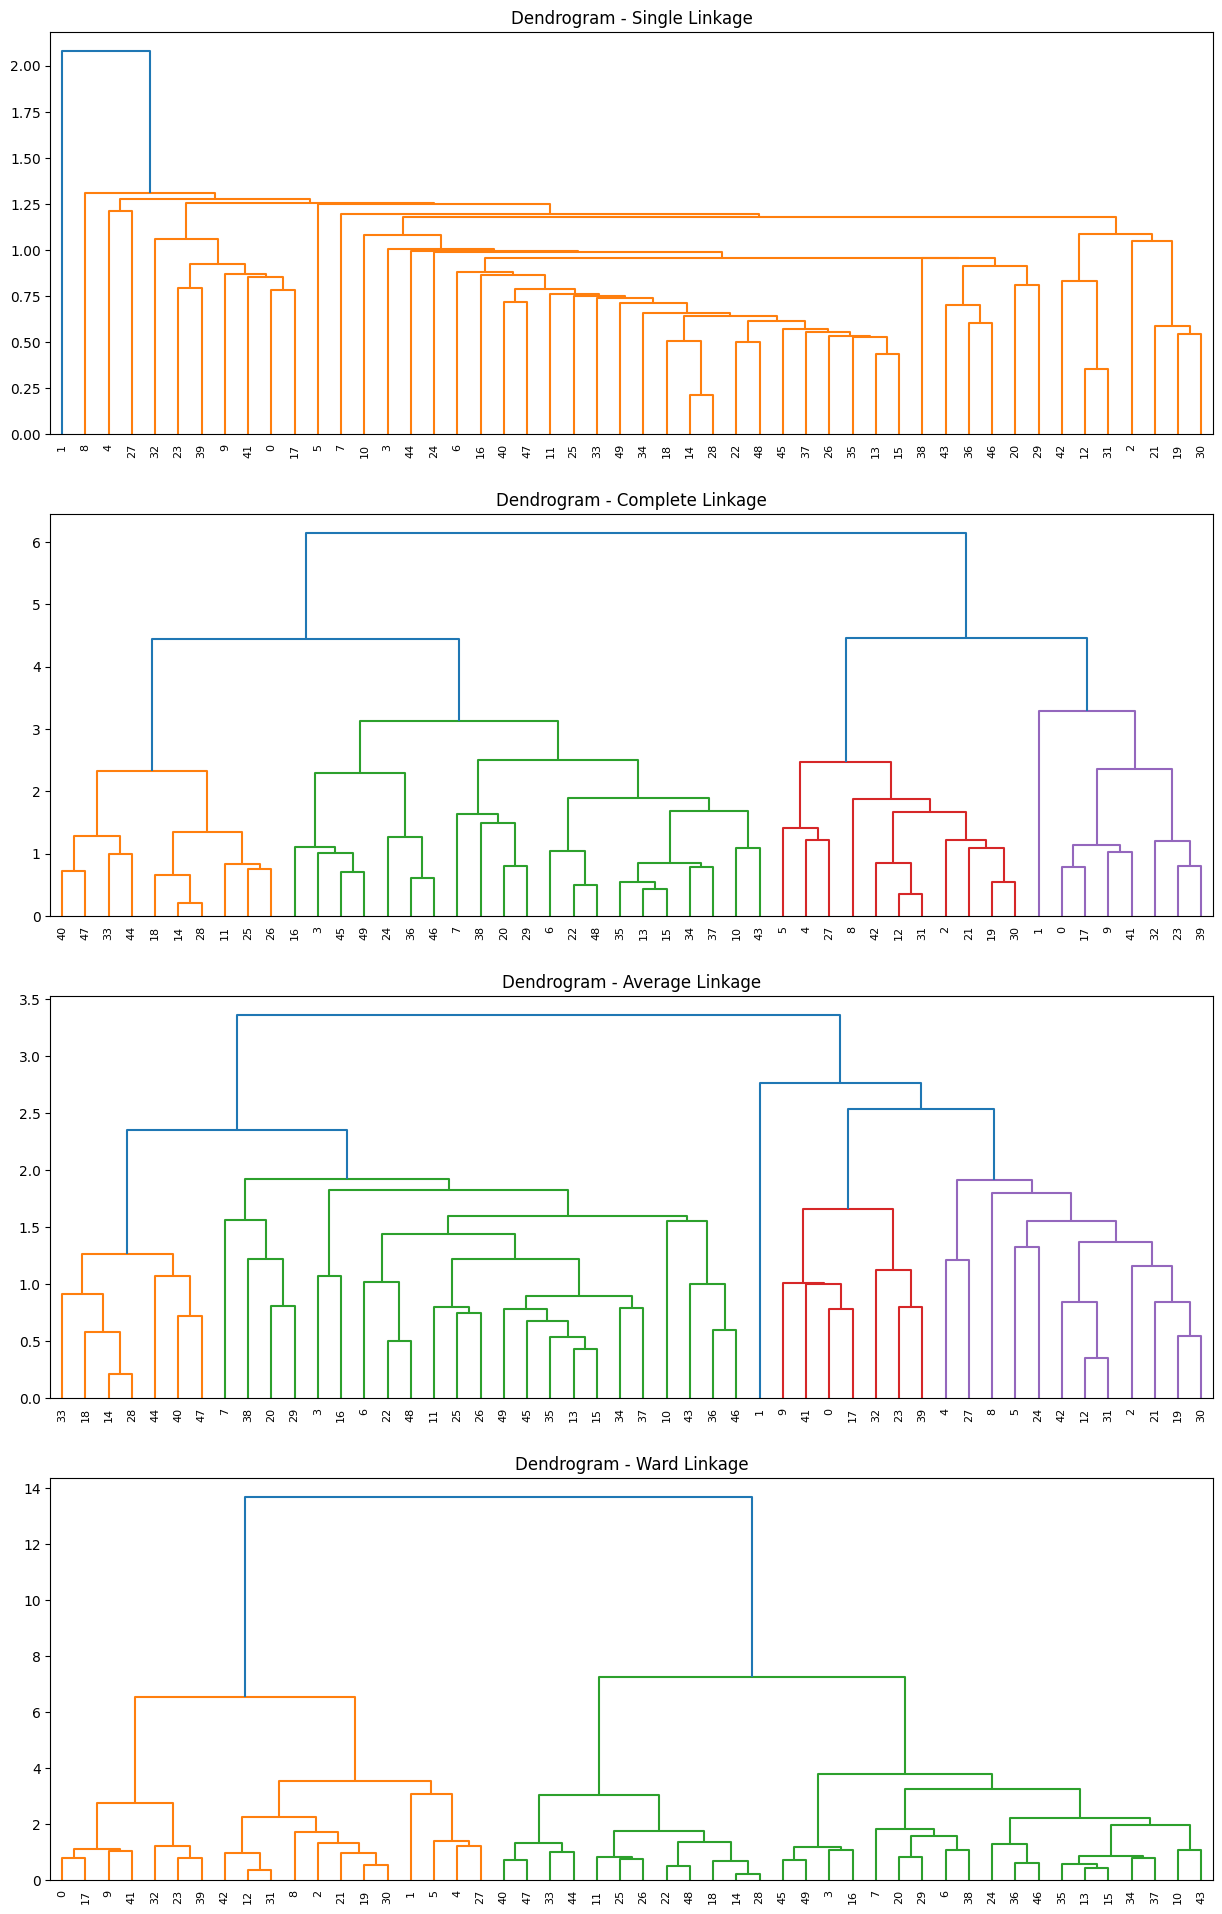

In [126]:
Z_single = sch.linkage(data, method='single')
Z_complete = sch.linkage(data, method='complete')
Z_average = sch.linkage(data, method='average')
Z_ward = sch.linkage(data, method='ward')

plt.figure(figsize=(15,24))
plt.subplot(4,1,1)
dendrogram = sch.dendrogram(Z_single)
plt.title('Dendrogram - Single Linkage')
plt.subplot(4,1,2)
dendrogram = sch.dendrogram(Z_complete)
plt.title('Dendrogram - Complete Linkage')
plt.subplot(4,1,3)
dendrogram = sch.dendrogram(Z_average)
plt.title('Dendrogram - Average Linkage')
plt.subplot(4,1,4)
dendrogram = sch.dendrogram(Z_ward)
plt.title('Dendrogram - Ward Linkage')
#plt.xlabel('Data point index')
#plt.ylabel('Distance')

In [127]:
hc_single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
y_hc_single = hc_single.fit_predict(data)
df['hc_single'] = y_hc_single

hc_complete = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
y_hc_complete = hc_complete.fit_predict(data)
df['hc_complete'] = y_hc_complete

hc_average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
y_hc_average = hc_average.fit_predict(data)
df['hc_average'] = y_hc_average

hc_ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc_ward = hc_ward.fit_predict(data)
df['hc_ward'] = y_hc_ward

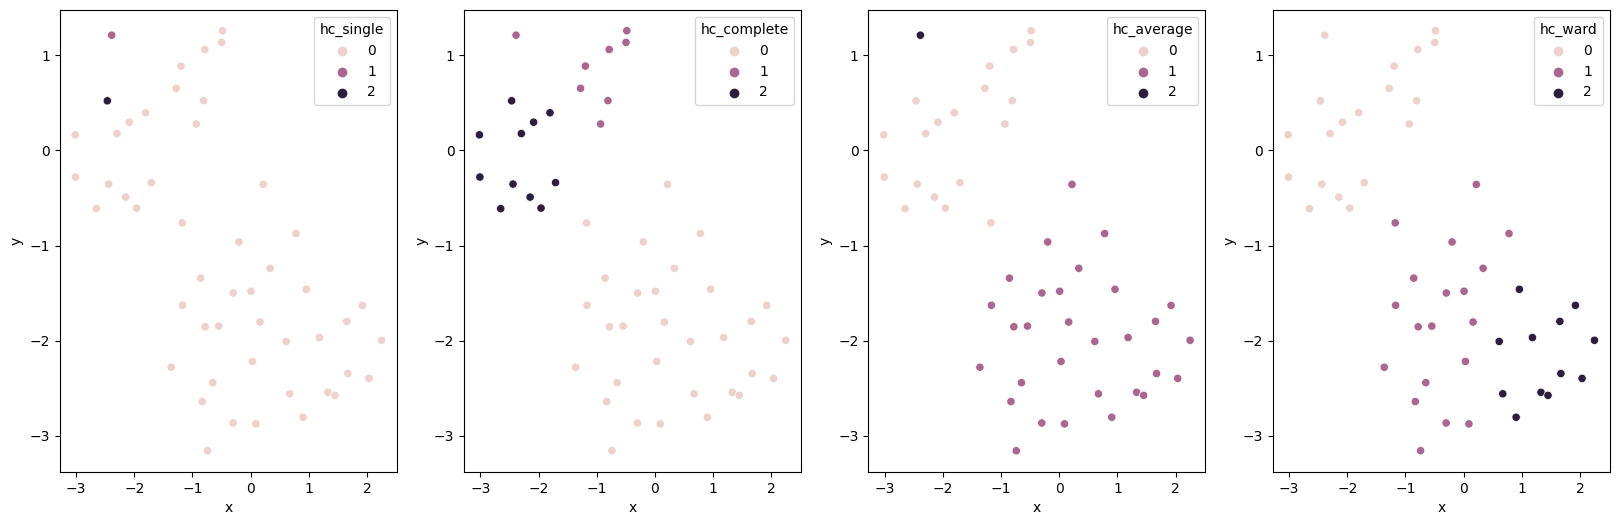

In [128]:
hcs = ['hc_single','hc_complete','hc_average','hc_ward']
figs, axes = plt.subplots(nrows=1,ncols=4,figsize=(20,6))
for i in range(len(hcs)):
    rawdata['cluster'] = df[hcs[i]]
    sns.scatterplot(data=df, x='x',y='y',hue=hcs[i],ax=axes[i])

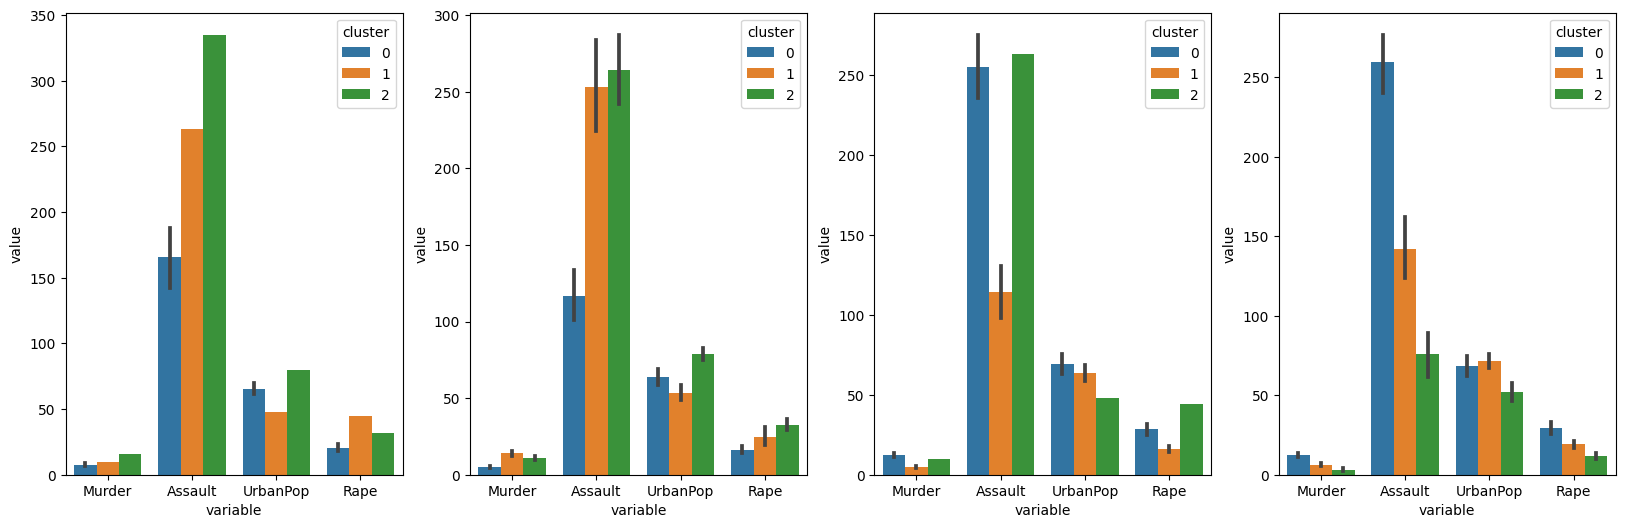

In [129]:
y_hcs = [y_hc_single,y_hc_complete,y_hc_average,y_hc_ward]
figs, axes = plt.subplots(nrows=1,ncols=4,figsize=(20,6))
for i in range(len(y_hcs)):    
    rawdata['cluster'] = y_hcs[i]
    sns.barplot(data=rawdata.melt(id_vars=['cluster']), x='variable',y='value', hue='cluster',ax=axes[i])

##### Observations
By looking at scatterplots, Agglomerative clustering with ward linkage has done best job of creating clusters
- cluster 0 and cluster 1 are high crime rate zones.
- cluster 2 can consider as safest (with low crime rate) zone.

### KMeans clustering

KMeans clustering algorithm starts with assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it.
The algorithm is finished when the assignment of instances to clusters no longer changes.

#### Elbow method
Used to find optimal value of k. It involves plotting the within-cluster sum of squares (WSS) against the number of clusters used in the k-means algorithm. The "elbow" in the plot is identified as the point of inflection where the WSS starts to decrease at a slower rate. This elbow point corresponds to the optimal number of clusters.

Text(0, 0.5, 'WCSS')

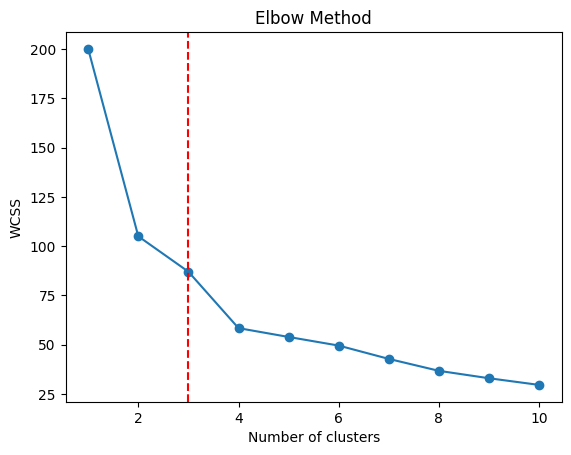

In [147]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0, n_init='auto')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='o')
plt.axvline(x=3,color='r',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [131]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=0)
y_kmean = kmeans.fit_predict(data)

In [132]:
df['kmeans'] = y_kmean
rawdata['cluster'] = y_kmean

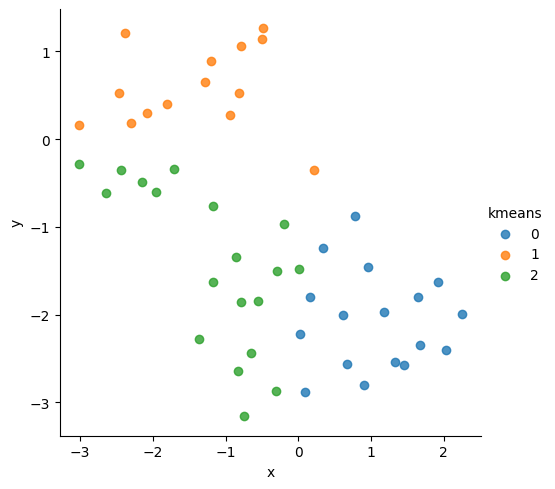

In [133]:
sns.lmplot(data=df, x='x',y='y',hue='kmeans',fit_reg=False)

<Axes: xlabel='variable', ylabel='value'>

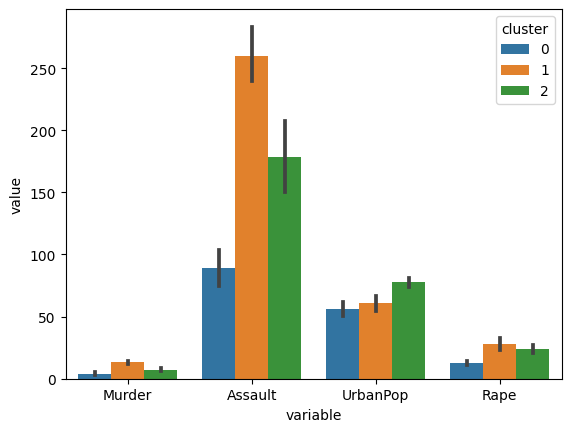

In [134]:
sns.barplot(data=rawdata.melt(id_vars=['cluster']), x='variable',y='value',hue='cluster')

##### Observations
KMeans has clustered our data in 3 groups:
- cluster 0 can be seen as safe zone (where all crime rates are low)
- cluster 1 has high murder, assault and rape cases.
- cluster 2 has high urbanpop crimes.

### DBScan clustering

In DBSCAN method, we dont need to define number of cluster. Instead, we need to set hyperparameters *eps* and *min_samples*. To determine optimal value of these parameters we will use some techniques given below.

- **eps: This parameter controls the radius of the neighborhood around each point.**\
    To find optimal value of eps we will plot elbow plot of distance between each point and k nearest neighbor. We will use kneighbors function from sklearn to determine distance to k nearest neighbor to each point.
- **min_samples: This parameter determines the minimum number of points required to form a dense region.**\
    To estimate optimal value of min_samples we will use silhoutte score, which measures how similar each point is to its own cluster compared to other clusters.

Text(0.5, 1.0, 'Elbow curve for estimating eps')

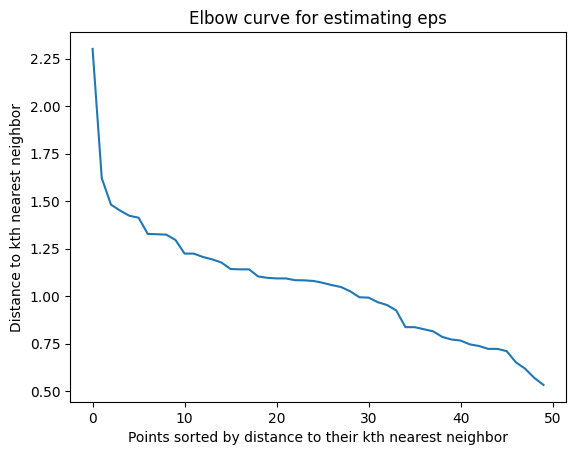

In [149]:
from sklearn.neighbors import kneighbors_graph

k = 3
distances = kneighbors_graph(data, k, mode='distance').toarray()
k_distances = distances.max(axis=1)

plt.plot(sorted(k_distances, reverse=True))
plt.xlabel('Points sorted by distance to their kth nearest neighbor')
plt.ylabel('Distance to kth nearest neighbor')
plt.title('Elbow curve for estimating eps')

Text(0.5, 1.0, 'Silhouette score for estimating min_samples')

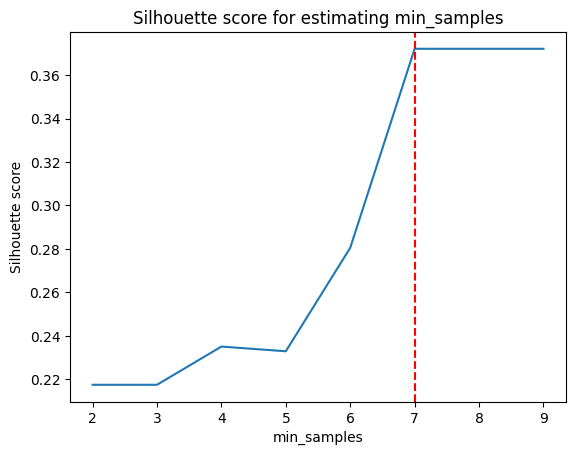

In [151]:
scores = []
for min_samples in range(2, 10):
    dbscan = DBSCAN(eps=1.3, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    score = silhouette_score(data, labels)
    scores.append(score)

plt.plot(range(2, 10), scores)
plt.axvline(x=7,color='r',linestyle='--')
plt.xlabel('min_samples')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for estimating min_samples')

From our analysis above we found optimal values,\
*eps=1.3* and *min_samples=7*

In [137]:
dbscan = DBSCAN(eps=1.3, min_samples=7)
dbscan.fit(data)

DBSCAN(eps=1.3, min_samples=7)

In [138]:
df['dbscan'] = dbscan.labels_
rawdata['cluster'] = dbscan.labels_

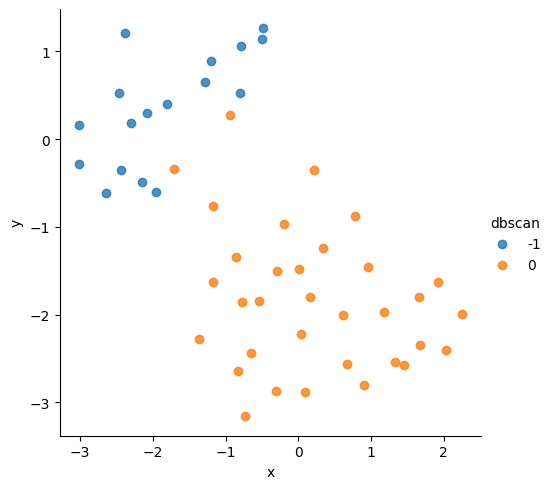

In [139]:
sns.lmplot(data=df, x='x',y='y',hue='dbscan',fit_reg=False)

<Axes: xlabel='variable', ylabel='value'>

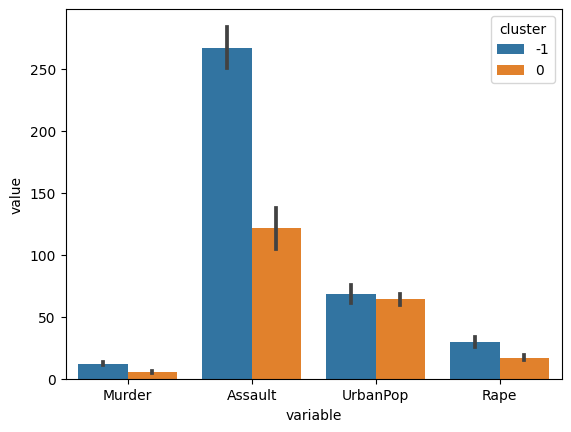

In [140]:
sns.barplot(data=rawdata.melt(id_vars=['cluster']), x='variable',y='value', hue='cluster')

##### Observations
DBScan produces 2 clusters:
- We can say cluster -1 contains states where all crime rates are high.
- And cluster 0 contains states where all crime rates are low.